In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer
import xgboost as xgb

### Import Data

In [68]:
df = pd.read_csv("C:/Users/dell/Downloads/train/train.csv")

In [69]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
0,7054.0,2.015152,0.0,32.0,NaN,4.0,NaN,NaN,7.0,6.0,...,0.0,NaN,NaN,1.0,1.0,1.0,3.0,2.0,NaN,1
1,147131.0,1.000000,NaN,2.0,NaN,NaN,0.0,NaN,6.0,5.0,...,NaN,NaN,0.0,3.0,1.0,1.0,2.0,10.0,NaN,1
2,132068.0,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,9.0,1.0,...,NaN,NaN,0.0,1.0,1.0,2.0,2.0,4.0,NaN,1
3,85195.0,2.071429,0.0,1.0,NaN,2.0,NaN,NaN,8.0,7.0,...,NaN,NaN,0.0,2.0,2.0,1.0,4.0,2.0,NaN,1
4,191948.0,2.000000,NaN,2.0,0.0,2.0,NaN,NaN,14.0,2.0,...,0.0,0.0,NaN,2.0,2.0,1.0,2.0,6.0,0.0,1


### Data Preprocessing

Check statistics

In [70]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
count,83912.000000,83959.000000,25179.0,83946.000000,25131.0,83947.000000,25137.0,25272.0,83967.000000,84008.000000,...,25084.0,25185.0,25367.0,83936.000000,83985.000000,83967.000000,83929.000000,83966.000000,24981.0,84377.000000
mean,100386.093098,1.585512,0.0,11.740988,0.0,1.906763,0.0,0.0,9.415139,9.026486,...,0.0,0.0,0.0,2.381040,2.567792,2.254326,2.334092,5.735965,0.0,0.792728
std,57993.333045,0.535283,0.0,34.643444,0.0,1.036347,0.0,0.0,17.288043,15.491942,...,0.0,0.0,0.0,2.050817,2.086498,1.989084,2.029105,2.988488,0.0,0.405355
min,5.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
25%,50010.250000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,3.000000,3.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,3.000000,0.0,1.000000
50%,100614.000000,2.000000,0.0,2.000000,0.0,2.000000,0.0,0.0,6.000000,6.000000,...,0.0,0.0,0.0,2.000000,2.000000,2.000000,2.000000,6.000000,0.0,1.000000
75%,150620.250000,2.000000,0.0,6.000000,0.0,2.000000,0.0,0.0,9.000000,9.000000,...,0.0,0.0,0.0,3.000000,3.000000,2.000000,2.000000,8.000000,0.0,1.000000
max,200906.000000,7.000000,0.0,3605.000000,0.0,13.000000,0.0,0.0,487.000000,449.000000,...,0.0,0.0,0.0,83.000000,87.000000,82.000000,73.000000,30.000000,0.0,1.000000


Many columns seem to have alot of null values and rest of the values only '0'

In [71]:
df_null=df.isnull().sum()

In [72]:
df_null

ID         465
X1         418
X2       59198
X3         431
X4       59246
         ...  
X136       410
X137       448
X138       411
X139     59396
label        0
Length: 141, dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


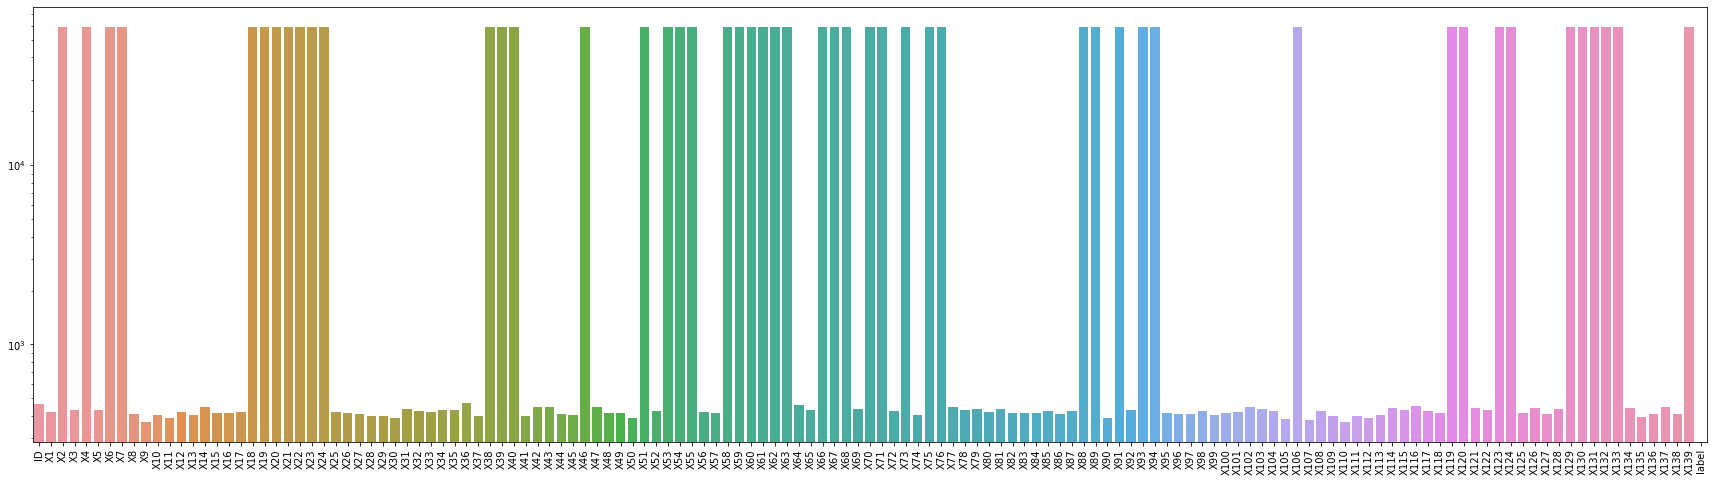

In [73]:
# Plot graph of null values
plt.figure(figsize=(30,8))
sns.barplot(df_null.index, df_null.values)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [74]:
# Getting columns with extremely high amount of nulls
max_null_indices=df_null.loc[df_null.values>30000].index

In [75]:
# confirming that the selected columns have only 2 unique values - 0s and nulls
more_than_2_unique=[]
for i in max_null_indices:
    
    #if any column has values other than 0s and nulls, this condition should be satisfied
    if len(df[i].unique())>2:
        more_than_2_unique.append(i)

print(more_than_2_unique)

[]


For first run, dropping columns with high nulls and only 0s for dimensionality reduction. (Next step - use predictive approach to impute this nulls instead of dropping columns)

In [76]:
df_dropped=df.drop(max_null_indices,axis=1)

In [77]:
df_dropped.dropna(subset=['ID'], inplace=True)

In [78]:
df_dropped.isnull().sum()

ID         0
X1       413
X3       430
X5       424
X8       408
        ... 
X135     388
X136     406
X137     442
X138     410
label      0
Length: 92, dtype: int64

Log dataset

In [79]:
log_df = pd.read_csv("C:/Users/dell/Downloads/log_train/log_train.csv")

log_df.head()

,ID,time,source,event,object
0,43980,2013-11-11T16:30:11,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
1,2648,2013-12-27T06:44:08,browser,access,UaqaZdJXEAHfzB9qbZkvAe2jc0xmI3Na
2,18588,2013-12-07T09:58:44,server,navigate,l0kj1vWrjGxi2YqQWGitPXDEoH5G5RYd
3,2679,2014-01-05T13:51:34,browser,access,S64EUU2p7wiyAtSxjzfSS6jLaHB3Y9RJ
4,2528,2013-12-17T12:09:36,server,access,DSPbj5O8mNBS0ccEiBGXnXJvTZstHNED


Each ID has multiple entries for source and event. So combined them together to create a categorical column with unique combinations of source + event. 

In [80]:
log_df['source_event'] = log_df['source'].str.cat(log_df['event'], sep='_')

In [81]:
log_df = log_df.drop(['time','source','event','object'],axis=1)

Group by to get count for each student for each source_event

In [82]:
grouped_df=log_df.groupby(['ID', 'source_event']).size().reset_index(name='Count')

In [83]:
grouped_df

,ID,source_event,Count
0,1,browser_access,19
1,1,browser_page_close,52
2,1,browser_problem,54
3,1,browser_video,22
4,1,server_access,66
...,...,...,...
520822,200901,browser_page_close,1
520823,200901,browser_video,1
520824,200901,server_access,3
520825,200901,server_navigate,2


Pivot the column such that each category will be its own column with single countvalue for each student

In [84]:
pivot_df = grouped_df.pivot(index='ID', columns='source_event', values='Count')

In [85]:
pivot_df = pivot_df.reset_index().rename_axis(columns={'index': 'ID'})

In [86]:
pivot_df

source_event,ID,browser_access,browser_page_close,browser_problem,browser_video,server_access,server_discussion,server_navigate,server_problem,server_wiki
0,1,19.0,52.0,54.0,22.0,66.0,NaN,17.0,7.0,NaN
1,3,22.0,19.0,84.0,7.0,33.0,19.0,10.0,1.0,NaN
2,4,NaN,5.0,4.0,4.0,47.0,NaN,10.0,1.0,NaN
3,5,89.0,65.0,91.0,57.0,71.0,21.0,19.0,20.0,NaN
4,6,NaN,NaN,2.0,NaN,10.0,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
114464,200897,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
114465,200898,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
114466,200900,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
114467,200901,NaN,1.0,NaN,1.0,3.0,NaN,2.0,NaN,NaN


Merge it with original dataset. (Also tried doing right join)

In [87]:
merged_df = pd.merge(pivot_df, df, on='ID', how='inner')

In [88]:
merged_df

,ID,browser_access,browser_page_close,browser_problem,browser_video,server_access,server_discussion,server_navigate,server_problem,server_wiki,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
0,5,89.0,65.0,91.0,57.0,71.0,21.0,19.0,20.0,NaN,...,NaN,NaN,0.0,5.0,5.0,1.0,7.0,6.0,NaN,0
1,7,90.0,38.0,54.0,50.0,66.0,20.0,15.0,12.0,NaN,...,0.0,0.0,NaN,2.0,2.0,3.0,2.0,12.0,NaN,0
2,13,74.0,16.0,85.0,56.0,64.0,3.0,10.0,28.0,NaN,...,NaN,NaN,NaN,1.0,2.0,6.0,7.0,3.0,NaN,0
3,23,NaN,21.0,NaN,11.0,37.0,NaN,11.0,NaN,NaN,...,0.0,0.0,NaN,8.0,1.0,2.0,2.0,2.0,NaN,1
4,32,NaN,9.0,5.0,1.0,18.0,6.0,8.0,2.0,NaN,...,0.0,NaN,NaN,2.0,4.0,2.0,8.0,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47690,200863,NaN,1.0,NaN,NaN,2.0,NaN,3.0,NaN,NaN,...,NaN,0.0,0.0,1.0,1.0,1.0,2.0,4.0,NaN,1
47691,200880,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,0.0,NaN,2.0,1.0,1.0,1.0,3.0,NaN,1
47692,200883,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,0.0,2.0,1.0,2.0,2.0,8.0,0.0,0
47693,200896,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,0.0,NaN,NaN,2.0,2.0,2.0,2.0,3.0,0.0,1


In [89]:
merged_df.isnull().sum()

ID                        0
browser_access        30167
browser_page_close    15267
browser_problem       30979
browser_video         18815
                      ...  
X136                    238
X137                    252
X138                    241
X139                  33522
label                     0
Length: 150, dtype: int64

In [90]:
merged_df.describe()

,ID,browser_access,browser_page_close,browser_problem,browser_video,server_access,server_discussion,server_navigate,server_problem,server_wiki,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
count,47695.000000,17528.000000,32428.000000,16716.000000,28880.000000,37422.000000,15659.000000,46146.000000,11738.000000,10747.000000,...,14113.0,14169.0,14338.0,47437.000000,47449.000000,47457.000000,47443.000000,47454.000000,14173.0,47695.000000
mean,99378.939134,12.196086,11.075984,18.969430,8.018352,18.447437,11.996552,6.382113,4.146447,2.412394,...,0.0,0.0,0.0,2.398507,2.585576,2.270371,2.347554,5.760842,0.0,0.787672
std,57917.565344,23.350716,16.809104,32.923112,12.497341,31.058837,45.176325,9.332907,6.556518,5.677251,...,0.0,0.0,0.0,2.088998,2.113880,2.039623,2.051671,2.997673,0.0,0.408960
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
25%,48750.500000,2.000000,2.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,3.000000,0.0,1.000000
50%,99711.000000,4.000000,4.000000,9.000000,3.000000,7.000000,4.000000,3.000000,2.000000,1.000000,...,0.0,0.0,0.0,2.000000,2.000000,2.000000,2.000000,6.000000,0.0,1.000000
75%,149361.000000,12.000000,13.000000,20.000000,9.000000,22.000000,10.000000,7.000000,4.000000,2.000000,...,0.0,0.0,0.0,3.000000,3.000000,2.000000,2.000000,8.000000,0.0,1.000000
max,200898.000000,375.000000,294.000000,560.000000,274.000000,2544.000000,2990.000000,470.000000,129.000000,388.000000,...,0.0,0.0,0.0,83.000000,87.000000,82.000000,73.000000,30.000000,0.0,1.000000


In [91]:
merged_df = merged_df.drop(['ID'],axis=1)

In [92]:
# merged_df.isnull().sum()

# # Drop ID column - not needed as a feature
# merged_df = merged_df.drop(['ID'],axis=1)

# plt.figure(figsize=(30,8))
# sns.barplot(merged_df.isnull().sum().index, merged_df.isnull().sum().values)
# plt.yscale('log')
# plt.xticks(rotation=90)
# plt.show()

# # # Plot graph of null values
# # plt.figure(figsize=(15,8))
# # sns.countplot(data=merged_df, x='source', hue='label', palette='Set1')
# # #plt.yscale('log')
# # #plt.xticks(rotation=90)
# # plt.show()

In [93]:
# # Plot graph of null values
# plt.figure(figsize=(15,8))
# sns.countplot(data=merged_df, x='event', hue='label', palette='Set1')
# #plt.yscale('log')
# #plt.xticks(rotation=90)
# plt.show()

Train test split

In [94]:
# Separate target and features
y = merged_df['label']
X = merged_df.drop(['label'],axis=1)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Impute nulls in rest of the columns - as all columns are numerical basic strategy used would be mean or median we chose median due to large difference between min and max values

In [96]:
# Create imputer object
num_cols = [
        col for col in X_train.select_dtypes(include=["int64", "float64"]).columns
    ]
imputer = ColumnTransformer(
[
    (
    "num_imputer",
    SimpleImputer(missing_values=np.nan, strategy='median'),
    #IterativeImputer(),
    num_cols
    ),
],
remainder="passthrough",
verbose_feature_names_out=False,
)

imputer.set_output(transform="pandas")
imputer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['browser_access', 'browser_page_close',
                                  'browser_problem', 'browser_video',
                                  'server_access', 'server_discussion',
                                  'server_navigate', 'server_problem',
                                  'server_wiki', 'X1', 'X2', 'X3', 'X4', 'X5',
                                  'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
                                  'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
                                  'X19', 'X20', 'X21', ...])],
                  verbose_feature_names_out=False)

In [97]:
# impute train and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

Check for correlations. (All columns are numerical so no need for categorical testing)

In [98]:
corr_matrix = X_train.corrwith(y_train)

In [99]:
highly_correlated_features = corr_matrix[abs(corr_matrix) > 0.65]
highly_correlated_features

Series([], dtype: float64)

In [100]:
# label_encoder = LabelEncoder()
# X_train['source_encoded'] = label_encoder.fit_transform(X_train['source'])

# # Chi-square test
# chi2, p, _, _ = chi2_contingency(pd.crosstab(X_train['source_encoded'], y_train))
# print("Chi-square test statistic:", chi2)
# print("p-value:", p)

# label_encoder = LabelEncoder()
# X_train['event_encoded'] = label_encoder.fit_transform(X_train['event'])

# # Chi-square test
# chi2, p, _, _ = chi2_contingency(pd.crosstab(X_train['event_encoded'], y_train))
# print("Chi-square test statistic:", chi2)
# print("p-value:", p)

Find and drop highly correlated features

In [101]:
threshold = 0.85
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [
    column for column in upper.columns if any(upper[column] > threshold)
]

In [102]:
high_corr_features

['X44', 'X49', 'X65', 'X118', 'X122', 'X128']

In [103]:
X_train.drop(high_corr_features, axis=1, inplace=True)

Even after imputation, some columns have only 0 as the value. Dropping them as they have no predictive power

In [104]:
# confirming that the selected columns have only 2 unique values - 0s and nulls
less_than_1_unique=[]
for i in X_train.columns:
    
    #if any column has values other than 0s and nulls, this condition should be satisfied
    if len(X_train[i].unique())==1:
        less_than_1_unique.append(i)

print(less_than_1_unique)

X_train.drop(less_than_1_unique, axis=1, inplace=True)

['X2', 'X4', 'X6', 'X7', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X38', 'X39', 'X40', 'X46', 'X51', 'X53', 'X54', 'X55', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X66', 'X67', 'X68', 'X70', 'X71', 'X73', 'X75', 'X76', 'X88', 'X89', 'X91', 'X93', 'X94', 'X106', 'X119', 'X120', 'X123', 'X124', 'X129', 'X130', 'X131', 'X132', 'X133', 'X139']


In [105]:
X_test=X_test[X_train.columns]

In [106]:
X_test

,browser_access,browser_page_close,browser_problem,browser_video,server_access,server_discussion,server_navigate,server_problem,server_wiki,X1,...,X117,X121,X125,X126,X127,X134,X135,X136,X137,X138
14802,4.0,1.0,9.0,3.0,2.0,4.0,4.0,2.0,1.0,1.04,...,6.0,1.000000,1.0,1.0,14.0,2.0,3.0,2.0,2.0,8.0
36377,2.0,1.0,9.0,2.0,7.0,4.0,2.0,2.0,1.0,2.00,...,10.0,1.000000,1.0,1.0,1.0,3.0,1.0,2.0,2.0,5.0
25222,4.0,4.0,9.0,3.0,7.0,4.0,1.0,2.0,1.0,2.00,...,2.0,2.000000,1.0,1.0,13.0,2.0,2.0,1.0,2.0,6.0
23931,4.0,10.0,19.0,9.0,11.0,4.0,5.0,2.0,1.0,1.00,...,18.0,2.000000,1.0,1.0,1.0,2.0,1.0,2.0,2.0,4.0
1640,4.0,4.0,9.0,1.0,2.0,4.0,3.0,2.0,1.0,1.00,...,9.0,1.000000,1.0,1.0,8.0,2.0,2.0,4.0,2.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34213,3.0,4.0,1.0,2.0,28.0,2.0,8.0,2.0,2.0,1.00,...,20.0,11.090909,1.0,1.0,10.0,1.0,1.0,1.0,4.0,3.0
5273,4.0,4.0,9.0,3.0,7.0,4.0,3.0,2.0,1.0,2.00,...,4.0,2.000000,1.0,1.0,13.0,2.0,1.0,2.0,2.0,5.0
41200,4.0,4.0,9.0,1.0,2.0,4.0,1.0,2.0,1.0,2.00,...,6.0,2.000000,1.0,1.0,18.0,3.0,1.0,2.0,1.0,4.0
32418,2.0,2.0,13.0,1.0,86.0,17.0,10.0,2.0,1.0,1.20,...,20.0,2.000000,1.0,1.0,19.0,2.0,3.0,1.0,2.0,1.0


In [107]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Fit PCA
# pca = PCA(n_components = 0.95)
# pca.fit(X_train)

# # # Scree plot
# # plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
# # plt.xlabel('Number of Components')
# # plt.ylabel('Explained Variance Ratio')
# # plt.title('Scree Plot')

Resampling

The data is imbalanced. We used SMOTE oversampling to make it balanced. threshold for minority class was set to 0.85

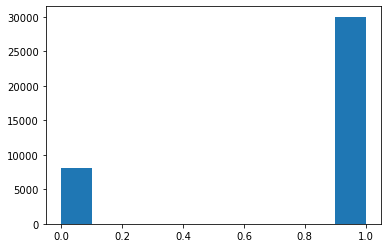

In [108]:
plt.hist(y_train)
plt.show()

In [109]:
# resample data
smote = SMOTE(sampling_strategy=0.85,random_state=42, k_neighbors=4)
X_train, y_train = smote.fit_resample(X_train, y_train)

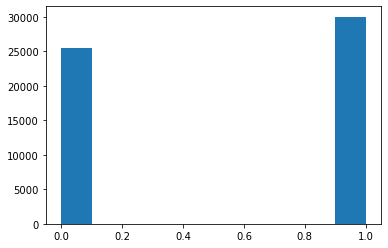

In [110]:
plt.hist(y_train)
plt.show()

### Model training

Tried out default random forest classifier and XGBoost classifier with 5 fold cross validation

In [111]:
# Create a Random Forest Classifier
#rf_classifier = RandomForestClassifier(random_state=42)

#rf_classifier = RandomForestClassifier(random_state=42)

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Perform cross-validation with F1 scoring
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='f1')  # 5-fold cross-validation

# Print the F1 scores after each fold
print("F1 Scores for each fold:", cv_scores)

# Calculate and print the mean F1 score
print("Mean F1 Score:", cv_scores.mean())


F1 Scores for each fold: [0.7976043  0.87309255 0.97007631 0.96901554 0.96573101]
Mean F1 Score: 0.915103941827032


In [112]:
# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [113]:
# Predict the labels for the test data
y_pred_test = xgb_classifier.predict(X_test)

In [114]:
# F1 for test data
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

F1 Score: 0.9203938477379497


Checking on actual test data

In [115]:
df_test = pd.read_csv("C:/Users/dell/Downloads/test/test.csv")

In [116]:
df_test

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
0,17547.0,1.272727,0.0,1.0,0.0,3.0,0.0,0.0,7.0,26.0,...,NaN,NaN,NaN,0.0,2.0,6.0,2.0,4.0,3.0,NaN
1,140449.0,1.000000,0.0,1.0,NaN,1.0,NaN,0.0,8.0,4.0,...,0.0,0.0,NaN,0.0,3.0,2.0,2.0,2.0,5.0,NaN
2,182658.0,2.000000,NaN,2.0,NaN,2.0,NaN,0.0,64.0,2.0,...,NaN,NaN,NaN,NaN,2.0,4.0,1.0,1.0,7.0,0.0
3,149652.0,1.000000,0.0,1.0,NaN,1.0,0.0,0.0,9.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,7.0,NaN
4,106304.0,2.000000,NaN,2.0,NaN,3.0,NaN,0.0,1.0,6.0,...,NaN,NaN,NaN,0.0,1.0,2.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,102422.0,1.000000,NaN,2.0,NaN,1.0,NaN,NaN,10.0,7.0,...,NaN,0.0,NaN,0.0,3.0,1.0,1.0,2.0,3.0,NaN
35978,129387.0,2.076923,0.0,1.0,0.0,3.0,0.0,0.0,6.0,5.0,...,NaN,NaN,NaN,0.0,2.0,2.0,2.0,2.0,2.0,0.0
35979,131835.0,1.000000,NaN,1.0,0.0,1.0,NaN,NaN,7.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.0,7.0,NaN
35980,68715.0,1.500000,NaN,23.0,0.0,6.0,NaN,NaN,2.0,22.0,...,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,9.0,NaN


In [117]:
log_test = pd.read_csv("C:/Users/dell/Downloads/log_test/log_test.csv")

In [118]:
log_test.head()

,ID,time,source,event,object
0,116554,2014-01-06T05:08:08,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
1,19439,2013-12-08T06:03:08,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
2,107141,2013-11-26T11:15:18,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
3,82090,2013-12-12T15:18:20,browser,video,vfBDLKTN9uOeruSh4LLBed14yLpyrqK8
4,86668,2013-11-25T13:30:39,server,access,raFEun0hpOJkjudwgs8gbTqL7ZxOMVZ1


In [119]:
log_test['source_event'] = log_test['source'].str.cat(log_test['event'], sep='_')

log_test = log_test.drop(['time','source','event','object'],axis=1)

grouped_df_test=log_test.groupby(['ID', 'source_event']).size().reset_index(name='Count')

grouped_df_test

,ID,source_event,Count
0,1,browser_access,2
1,1,browser_page_close,14
2,1,browser_problem,25
3,1,browser_video,7
4,1,server_access,20
...,...,...,...
409861,200888,server_access,1
409862,200888,server_wiki,1
409863,200895,server_navigate,1
409864,200901,browser_page_close,1


In [120]:
pivot_df_test = grouped_df_test.pivot(index='ID', columns='source_event', values='Count')

pivot_df_test = pivot_df_test.reset_index().rename_axis(columns={'index': 'ID'})

pivot_df_test

source_event,ID,browser_access,browser_page_close,browser_problem,browser_video,server_access,server_discussion,server_navigate,server_problem,server_wiki
0,1,2.0,14.0,25.0,7.0,20.0,NaN,8.0,1.0,NaN
1,3,12.0,3.0,51.0,2.0,12.0,7.0,4.0,2.0,NaN
2,4,NaN,5.0,1.0,NaN,17.0,NaN,5.0,NaN,NaN
3,5,31.0,22.0,47.0,29.0,35.0,13.0,11.0,12.0,NaN
4,6,NaN,2.0,NaN,2.0,2.0,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101905,200887,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
101906,200888,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
101907,200895,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
101908,200901,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
merged_df_test = pd.merge(pivot_df_test, df_test, on='ID', how='right')

merged_df_test.head()

,ID,browser_access,browser_page_close,browser_problem,browser_video,server_access,server_discussion,server_navigate,server_problem,server_wiki,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
0,17547.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,0.0,2.0,6.0,2.0,4.0,3.0,NaN
1,140449.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,0.0,0.0,NaN,0.0,3.0,2.0,2.0,2.0,5.0,NaN
2,182658.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,4.0,1.0,1.0,7.0,0.0
3,149652.0,NaN,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,7.0,NaN
4,106304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,1.0,2.0,2.0,2.0,2.0,0.0


In [122]:
ID = merged_df_test['ID']

In [123]:
len(merged_df_test)

35982

In [124]:
merged_df_test=merged_df_test.drop(['ID'],axis=1)

In [125]:
merged_df_test = imputer.transform(merged_df_test)

In [126]:
merged_df_test = merged_df_test[X_train.columns]

In [127]:
merged_df_test

,browser_access,browser_page_close,browser_problem,browser_video,server_access,server_discussion,server_navigate,server_problem,server_wiki,X1,...,X117,X121,X125,X126,X127,X134,X135,X136,X137,X138
0,4.0,4.0,9.0,1.0,7.0,4.0,1.0,2.0,1.0,1.272727,...,7.0,17.666667,1.0,1.0,19.0,2.0,6.0,2.0,4.0,3.0
1,4.0,4.0,9.0,3.0,7.0,2.0,2.0,2.0,1.0,1.000000,...,4.0,1.000000,1.0,1.0,17.0,3.0,2.0,2.0,2.0,5.0
2,4.0,4.0,9.0,1.0,7.0,4.0,1.0,2.0,1.0,2.000000,...,2.0,6.347826,1.0,1.0,16.0,2.0,4.0,1.0,1.0,7.0
3,4.0,4.0,9.0,3.0,7.0,2.0,3.0,2.0,1.0,1.000000,...,6.0,1.000000,1.0,1.0,16.0,3.0,1.0,1.0,2.0,7.0
4,4.0,4.0,9.0,3.0,7.0,4.0,3.0,2.0,1.0,2.000000,...,11.0,2.000000,1.0,1.0,7.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,4.0,4.0,9.0,3.0,7.0,4.0,1.0,2.0,1.0,1.000000,...,20.0,1.000000,1.0,1.0,7.0,3.0,1.0,1.0,2.0,3.0
35978,4.0,4.0,9.0,3.0,7.0,4.0,3.0,2.0,1.0,2.076923,...,19.0,5.651163,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
35979,4.0,4.0,9.0,3.0,7.0,4.0,3.0,2.0,1.0,1.000000,...,4.0,2.000000,1.0,1.0,5.0,3.0,1.0,2.0,1.0,7.0
35980,1.0,4.0,9.0,3.0,7.0,4.0,1.0,2.0,1.0,1.500000,...,6.0,1.000000,1.0,1.0,16.0,1.0,4.0,1.0,1.0,9.0


In [128]:
y_pred= xgb_classifier.predict(merged_df_test)

In [129]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = ID
sample_submission['LABEL'] = y_pred

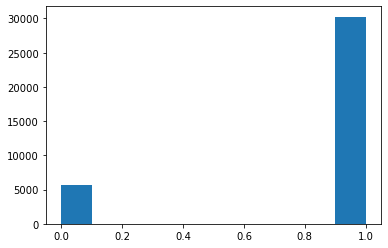

In [130]:
plt.hist(sample_submission['LABEL'])
plt.show()

In [131]:
sample_submission.to_csv('C:/Users/dell/Downloads/submission_2.csv', index=False)